# TF IDF

## IMPORT LIBRARY DAN MEMBACA DATA

In [47]:
import pandas as pd 
import numpy as np

dm = pd.read_csv("D:\CODING\SMT5\ICP\SOURCECODE\OUTPUT_MAIN\Labelling\Labelling_Sentiment_Score_WEIGHT_25-12-2022_21-48.csv", usecols=["tweet_clean", "label"])
dm.columns = ["tweet_clean", "label"]
df = dm.dropna()
df.head(10)

,tweet_clean,label
0,"['tangkap', 'yuli', 'sumpil', 'suporter', 'rus...",negative
1,"['polisi', 'turun', 'tangan', 'membubarkan', '...",negative
2,"['laah', 'komnas', 'ham', 'sdh', 'jlas', 'mnjl...",negative
3,"['lihat', 'bonek', 'rusuh', 'persija', 'rusuh'...",negative
4,"['rusuhnya', 'dmn', 'pitch', 'invader', 'klo',...",negative
5,"['woy', 'liat', 'gak', 'rusuh', 'bonek', 'sda'...",negative
6,"['gas', 'air', 'mata', 'tembakkan', 'dilarang'...",negative
7,"['pemain', 'arema', 'rusuh', 'memukul', 'pemai...",negative
8,"['paham', 'gas', 'airmatanya', 'arah', 'tribun...",negative
9,"['menyalahkan', 'seporter', 'bikin', 'rusuh', ...",negative


## MENGITUNG JUMLAH LABEL POSITIF DAN NEGATIF

In [48]:
#checking the count of the dependent variable
df['label'].value_counts()

negative    770
positive     34
Name: label, dtype: int64

## MENGUBAH STRING FORMAT KE LIST

In [49]:
# convert list formated string to list
import ast
index = np.random.randint(len(df))

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

df["tekslist"] = df["tweet_clean"].apply(convert_text_list)

print(df["tekslist"][23])

print("\ntype : ", type(df["tekslist"][index]))

['coba', 'bikin', 'monumental', 'virtual', 'twitter', 'korban', 'kajuruhan', 'gas', 'air', 'mata', 'suporter', 'rusuh', 'pantaskah', 'diperlakukan', 'mikir', 'wooy', 'buzzerrrsss']

type :  <class 'list'>


## MENGHITUNG TF

In [50]:
def calc_TF(document):
    #perhitungan jumlah kata
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    #perhitungan tf
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

df["TF_dict"] = df['tekslist'].apply(calc_TF)

df["TF_dict"].head()

0    {'tangkap': 0.07692307692307693, 'yuli': 0.076...
1    {'polisi': 0.05555555555555555, 'turun': 0.111...
2    {'laah': 0.025, 'komnas': 0.025, 'ham': 0.025,...
3    {'lihat': 0.05263157894736842, 'bonek': 0.0526...
4    {'rusuhnya': 0.0625, 'dmn': 0.0625, 'pitch': 0...
Name: TF_dict, dtype: object

In [51]:
#hasil tf

print('%20s' % "term", "\t", "TF\n")
for key in df["TF_dict"][index]:
    print('%20s' % key, "\t", df["TF_dict"][index][key])

                term 	 TF

           supporter 	 0.07142857142857142
               bikin 	 0.07142857142857142
               rusuh 	 0.14285714285714285
           neccesary 	 0.07142857142857142
           condition 	 0.07142857142857142
            kejadian 	 0.07142857142857142
                kalo 	 0.07142857142857142
           suuporter 	 0.07142857142857142
         kejadiannya 	 0.14285714285714285
            penyebab 	 0.07142857142857142
            utamanya 	 0.07142857142857142
                 tpi 	 0.07142857142857142


## MENGHITUNG DF

In [52]:
def calc_DF(tfDict):
    count_DF = {}
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(df["TF_dict"])

## MENGHITUNG IDF

In [53]:
#menghitung idf

n_document = len(df)
def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict
  
#penyimpanan kamus idf
IDF = calc_IDF(n_document, DF)

## MENGHITUNG TF-IDF

In [54]:
#perhitungan TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#penyimpanan variabel TF-IDF 
df["TF-IDF_dict"] = df["TF_dict"].apply(calc_TF_IDF)

In [55]:
# memunculkan nilai TF-IDF

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in df["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", df["TF_dict"][index][key] ,"\t" , df["TF-IDF_dict"][index][key])

                term 	         TF 	              TF-IDF

           supporter 	 0.07142857142857142 	 0.061475260826339945
               bikin 	 0.07142857142857142 	 0.16393929389332337
               rusuh 	 0.14285714285714285 	 0.061431115016291914
           neccesary 	 0.07142857142857142 	 0.42831800632993006
           condition 	 0.07142857142857142 	 0.42831800632993006
            kejadian 	 0.07142857142857142 	 0.22387508626353947
                kalo 	 0.07142857142857142 	 0.1572116356747733
           suuporter 	 0.07142857142857142 	 0.3993562128936326
         kejadiannya 	 0.14285714285714285 	 0.6996913999929872
            penyebab 	 0.07142857142857142 	 0.2570397725586179
            utamanya 	 0.07142857142857142 	 0.3388349371516895
                 tpi 	 0.07142857142857142 	 0.31335815544178003


In [56]:
#matrik tf-idf
# pengurutan descending berdasarkan nilai DF  
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# pembuatan list kata dari pengurutan `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

df["TF_IDF_Vec"] = df["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("tampil baris pertama matrix TF_IDF_Vec Series\n")
print(df["TF_IDF_Vec"])

print("\nukuran matrix : ", len(df["TF_IDF_Vec"]))

tampil baris pertama matrix TF_IDF_Vec Series

0      [0.033078292701080265, 0.0, 0.0, 0.07843987278...
1      [0.0238898780618913, 0.09562818350763992, 0.0,...
2      [0.021500890255702173, 0.0, 0.0, 0.05098591730...
3      [0.06789754817590159, 0.0, 0.0, 0.107338773284...
4      [0.0, 0.0, 0.0, 0.06373239663740292, 0.0668249...
                             ...                        
799    [0.02866785367426956, 0.05737691010458395, 0.0...
800    [0.0238898780618913, 0.04781409175381996, 0.05...
801    [0.017917408546418476, 0.035860568815364965, 0...
802    [0.02866785367426956, 0.028688455052291974, 0....
803    [0.033078292701080265, 0.06620412704375071, 0....
Name: TF_IDF_Vec, Length: 804, dtype: object

ukuran matrix :  804


## MENAMPILKAN TOP 50

In [57]:
#menampilkan top 50 term tf-idf
import matplotlib.pyplot as plt
# konversi ke dalam List
TF_IDF_Vec_List = np.array(df["TF_IDF_Vec"].to_list())
 
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
rank_sort = ranking.sort_values('rank', ascending=True)
rank_sort.reset_index(drop=True, inplace=True)


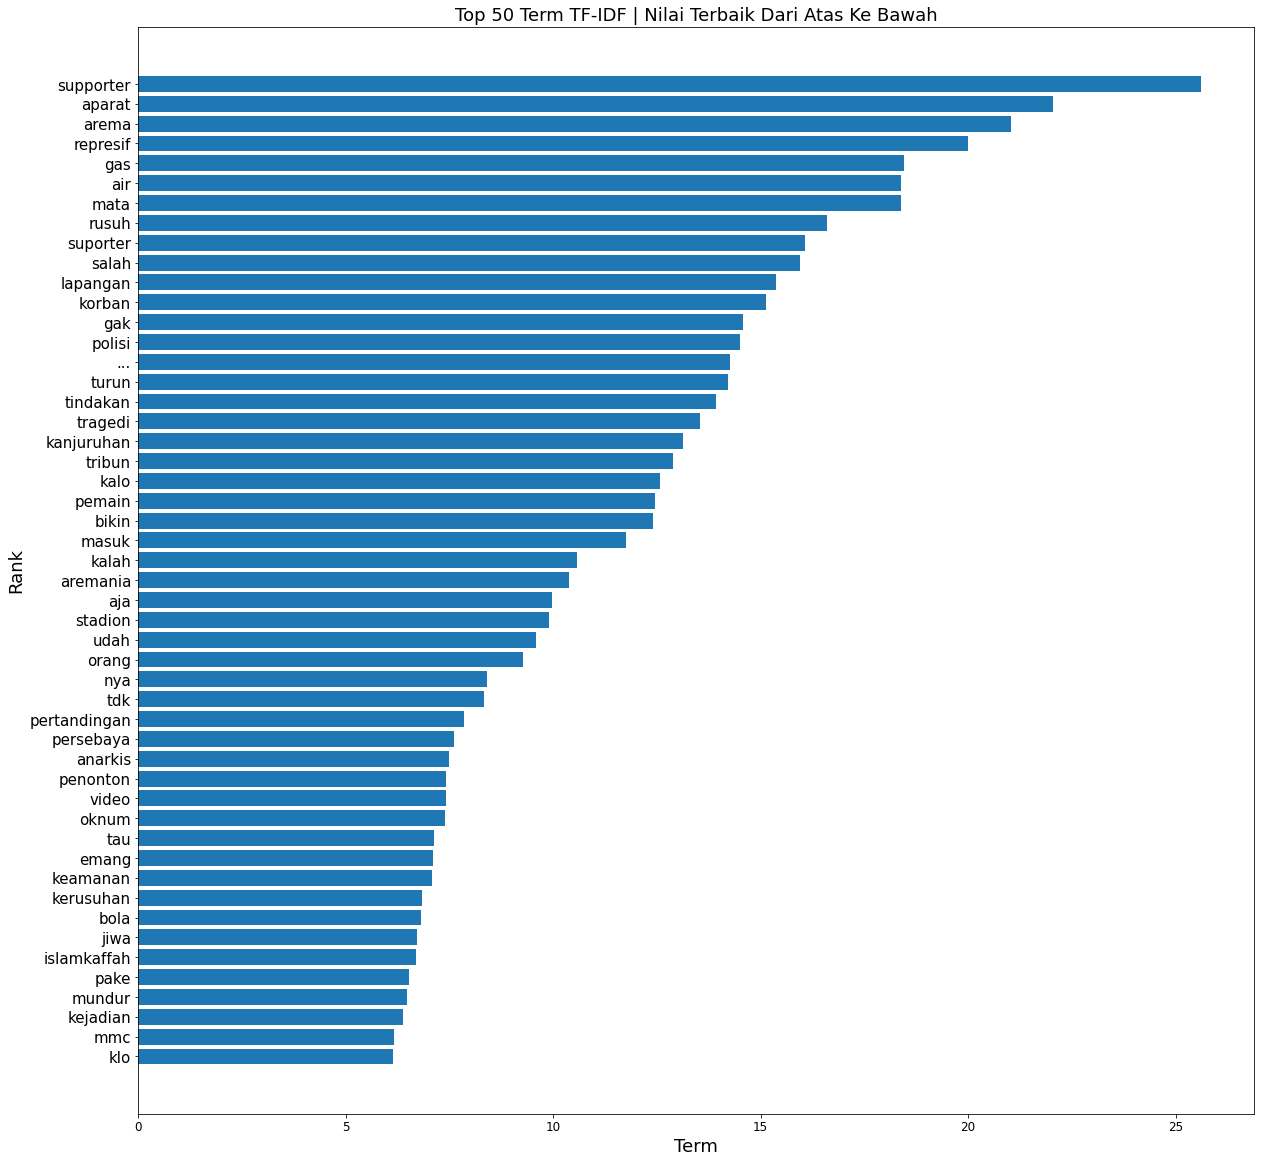

In [58]:
def tampil_barplot(data, x, y, title, xlabel, ylabel, figsize=(20, 20)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.barh(data[x], data[y])
    ax.set_title(title,fontsize=18)
    ax.set_xlabel(xlabel,fontsize=18)
    ax.set_ylabel(ylabel,fontsize=18)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=12)
    plt.show()
tampil_barplot(rank_sort, "term", "rank", "Top 50 Term TF-IDF | Nilai Terbaik Dari Atas Ke Bawah", "Term", "Rank")

In [59]:
df

,tweet_clean,label,tekslist,TF_dict,TF-IDF_dict,TF_IDF_Vec
0,"['tangkap', 'yuli', 'sumpil', 'suporter', 'rus...",negative,"[tangkap, yuli, sumpil, suporter, rusuh, sblm,...","{'tangkap': 0.07692307692307693, 'yuli': 0.076...","{'tangkap': 0.3455672839879036, 'yuli': 0.4300...","[0.033078292701080265, 0.0, 0.0, 0.07843987278..."
1,"['polisi', 'turun', 'tangan', 'membubarkan', '...",negative,"[polisi, turun, tangan, membubarkan, supporter...","{'polisi': 0.05555555555555555, 'turun': 0.111...","{'polisi': 0.10852226782135949, 'turun': 0.218...","[0.0238898780618913, 0.09562818350763992, 0.0,..."
2,"['laah', 'komnas', 'ham', 'sdh', 'jlas', 'mnjl...",negative,"[laah, komnas, ham, sdh, jlas, mnjlaskn, bhw, ...","{'laah': 0.025, 'komnas': 0.025, 'ham': 0.025,...","{'laah': 0.14991130221547552, 'komnas': 0.1397...","[0.021500890255702173, 0.0, 0.0, 0.05098591730..."
3,"['lihat', 'bonek', 'rusuh', 'persija', 'rusuh'...",negative,"[lihat, bonek, rusuh, persija, rusuh, klub, ru...","{'lihat': 0.05263157894736842, 'bonek': 0.0526...","{'lihat': 0.2577810421026795, 'bonek': 0.20615...","[0.06789754817590159, 0.0, 0.0, 0.107338773284..."
4,"['rusuhnya', 'dmn', 'pitch', 'invader', 'klo',...",negative,"[rusuhnya, dmn, pitch, invader, klo, masuk, la...","{'rusuhnya': 0.0625, 'dmn': 0.0625, 'pitch': 0...","{'rusuhnya': 0.30611498749693195, 'dmn': 0.331...","[0.0, 0.0, 0.0, 0.06373239663740292, 0.0668249..."
...,...,...,...,...,...,...
799,"['orang', 'bacot', 'ngomong', 'teori', 'akibat...",negative,"[orang, bacot, ngomong, teori, akibat, kalo, s...","{'orang': 0.06666666666666667, 'bacot': 0.0666...","{'orang': 0.18651859807122265, 'bacot': 0.3727...","[0.02866785367426956, 0.05737691010458395, 0.0..."
800,"['blg', 'kontribusi', 'kesalahannya', 'pssi', ...",negative,"[blg, kontribusi, kesalahannya, pssi, lib, apa...","{'blg': 0.05555555555555555, 'kontribusi': 0.0...","{'blg': 0.3106103878061587, 'kontribusi': 0.33...","[0.0238898780618913, 0.04781409175381996, 0.05..."
801,"['ngakak', 'kerusuhan', 'smbil', 'nimbul', 'ko...",negative,"[ngakak, kerusuhan, smbil, nimbul, korban, jiw...","{'ngakak': 0.041666666666666664, 'kerusuhan': ...","{'ngakak': 0.24985217035912588, 'kerusuhan': 0...","[0.017917408546418476, 0.035860568815364965, 0..."
802,"['emg', 'kenyataannya', 'suporterny', 'nerima'...",negative,"[emg, kenyataannya, suporterny, nerima, kekala...","{'emg': 0.06666666666666667, 'kenyataannya': 0...","{'emg': 0.2654366045384504, 'kenyataannya': 0....","[0.02866785367426956, 0.028688455052291974, 0...."


## MENYIMPAN KEDALAM CSV FILE

In [60]:
#PEMODELAN MENGGUNAKAN SVM CLASSIFIER
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn import svm
from sklearn import metrics

vectorizer = TfidfVectorizer (max_features=3000)

In [61]:
v_data = vectorizer.fit_transform(df['tweet_clean']).toarray()
v_data

array([[0.        , 0.        , 0.        , ..., 0.38398709, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [62]:
df['label'].head(5)

0    negative
1    negative
2    negative
3    negative
4    negative
Name: label, dtype: object

In [63]:
target_encoder = LabelEncoder()
df["target"] = target_encoder.fit_transform(df["label"])

In [64]:
df['target'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(v_data, df["target"], test_size=0.3, random_state=np.random.randint(1000), shuffle=True)

In [66]:
from collections import Counter

from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 534, 1: 28})
After Counter({0: 534, 1: 534})


In [67]:
r_stt = 909 #np.random.randint(1000)
model_svm = svm.SVC(kernel='sigmoid', C=1.0, gamma='auto', probability=True, random_state=r_stt, verbose=True, max_iter=99999999, shrinking = True, decision_function_shape = "ovr", break_ties = False)
print(r_stt)
model_svm.fit(X_train_sm, y_train_sm)

909
[LibSVM]

SVC(gamma='auto', kernel='sigmoid', max_iter=99999999, probability=True,
    random_state=909, verbose=True)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model_svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred,zero_division=1))

print("Recall:",metrics.recall_score(y_test, y_pred,zero_division=1))

print("Confusion Matrix \n",metrics.confusion_matrix(y_test, y_pred),"\n")
print("Classification Report \n",metrics.classification_report(y_test, y_pred,zero_division=1))

Accuracy: 0.8842975206611571
Precision: 0.07692307692307693
Recall: 0.3333333333333333
Confusion Matrix 
 [[212  24]
 [  4   2]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       236
           1       0.08      0.33      0.12         6

    accuracy                           0.88       242
   macro avg       0.53      0.62      0.53       242
weighted avg       0.96      0.88      0.92       242



In [69]:
tweet = ''
v_data = vectorizer.transform([tweet]).toarray()
y_preds = model_svm.predict(v_data)

#dengan asumsi bahwa 1 merupakan label positif
if y_preds == 1:
    print('Positif')
else:
    print('Negatif')

Negatif
